## Compute Drawdowns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


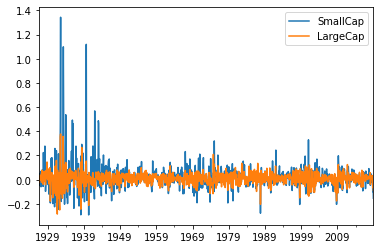

In [55]:
data = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',
                   header=0, index_col=0, parse_dates=True, na_values=[-99.99])
rets = data[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets / 100
rets.index = pd.to_datetime(rets.index, format='%Y%m').to_period('M')
rets.plot.line()
rets.info()

<AxesSubplot:>

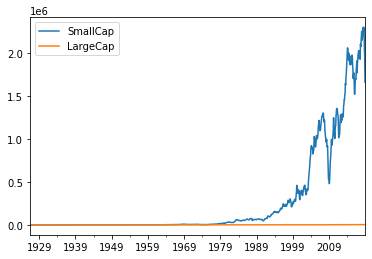

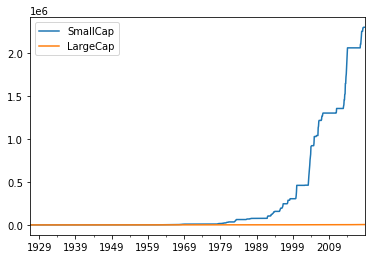

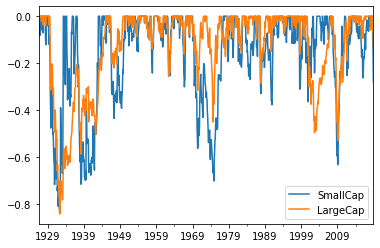

In [30]:
wealth = (1 + rets).cumprod()
wealth.plot()
peaks = wealth.cummax()
peaks.plot()
dds = (wealth - peaks) / peaks
dds.plot()

In [47]:
dds.idxmin()

SmallCap    1932-05
LargeCap    1932-05
dtype: period[M]

In [48]:
def drawdown(return_series: pd.Series):
    """
    Takes a time series of asset returns and returns a pd.DataFrame that contains:
    * Wealth index
    * Previous peaks
    * Percent drawdowns
    """
    wealth = 1000 * (1 + return_series).cumprod()
    peaks = wealth.cummax()
    drawdowns = (wealth - peaks) / peaks
    return pd.DataFrame({
        'Wealth': wealth,
        'Peaks': peaks,
        'Drawdowns': drawdowns
    })

<AxesSubplot:>

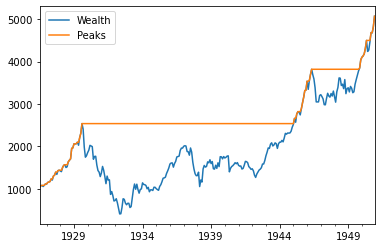

In [54]:
drawdown(rets[:'1950']['LargeCap'])[['Wealth','Peaks']].plot()

In [56]:
rets

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270
...,...,...
2018-08,0.0241,0.0234
2018-09,-0.0168,0.0087
2018-10,-0.1002,-0.0657
2018-11,-0.0365,0.0253


<AxesSubplot:>

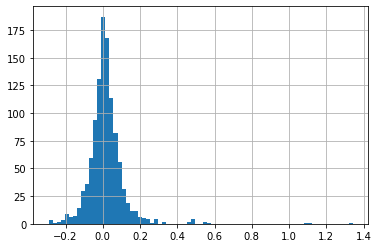

In [63]:
rets['SmallCap'].hist(bins=75)

In [71]:
(rets['LargeCap']*100).mean()

0.886981981981982

In [74]:
%config Completer.use_jedi = False

In [78]:
columns = {
    'Lo 10': 'SmallCap',
    'Hi 10': 'LargeCap'
}
rets[columns.values()]

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270
...,...,...
2018-08,0.0241,0.0234
2018-09,-0.0168,0.0087
2018-10,-0.1002,-0.0657
2018-11,-0.0365,0.0253
